In [ ]:
## 1 Load Data

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=57b8a78ebf7637ac8e36a2db5f47f2ad197d234f9f1747f2df6140fe2ee58ab0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File path
file_path = '/content/drive/MyDrive/CWD Band Quality Prediction/Band Data/Band Data 8X15 Only - Selected data.csv'

# Load data into DataFrame
try:
    band_df = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print("File not found. Please double-check the file path.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully!


In [ ]:
# Display first few rows of the DataFrame
band_df.head()


,Actual_ ClampPrsLeft,Actual_ClampPrsRight,Actual_ClampPrsFwd,Actual_HydrOilTemp,Actual_TransformerTemp,Actual_SCR_Unit_Temp,Actual_UpSettingPrs,Actual_RealTimeNBedPosition,Actual_Flash_1_Speed,Actual_Flash_2_Speed,...,CPF72,CPF73,CPF74,CPF75,CPF76,CPF77,CPF78,CPF79,CPF80,Defect
0,33.3,34.4,135.6,8012.2,44.1,100.4,71.4,37.6,8.1,8.7,...,60.4,64.0,66.6,67.4,68.3,68.8,69.3,69.7,0.0,Welding_Crack
1,33.8,34.9,140.3,7813.6,42.6,100.4,64.8,38.4,8.0,8.6,...,58.6,65.5,67.5,68.6,69.8,70.3,71.0,71.6,73.9,Welding_Crack
2,34.0,34.8,137.8,7857.1,42.9,100.4,71.0,38.2,8.3,9.1,...,70.2,71.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Welding_Crack
3,36.8,37.3,146.4,7482.3,40.1,100.4,70.2,20.6,6.3,8.3,...,29.2,18.0,11.7,8.3,6.2,24.9,47.6,66.2,0.0,Welding_Crack
4,35.2,35.6,143.9,7682.9,41.6,100.4,78.0,38.0,7.8,8.3,...,69.1,70.1,71.9,72.9,73.4,76.3,0.0,0.0,0.0,Welding_Crack


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Defect' is the target column
X = band_df.drop('Defect', axis=1)  # Features
Y = band_df['Defect']  # Target

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=123)

# Checking the shapes of train and test sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((95, 340), (24, 340), (95,), (24,))

In [ ]:
## 2 Train Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classif = RandomForestClassifier()

rf_classif.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
## 3 Make Prediction

In [ ]:
Y_test_preds = rf_classif.predict(X_test)

Y_test_preds[:5]

array(['Welding_Crack', 'Good_Product', 'Good_Product', 'Good_Product',
       'Good_Product'], dtype=object)

In [ ]:
## 4 Evaluate Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Test Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))

print("\nConfusion Matrix :")
print(confusion_matrix(Y_test, Y_test_preds))

print("\nClassification Report :")
print(classification_report(Y_test, Y_test_preds))

Test Accuracy : 0.96

Confusion Matrix :
[[17  1]
 [ 0  6]]

Classification Report :
               precision    recall  f1-score   support

 Good_Product       1.00      0.94      0.97        18
Welding_Crack       0.86      1.00      0.92         6

     accuracy                           0.96        24
    macro avg       0.93      0.97      0.95        24
 weighted avg       0.96      0.96      0.96        24



In [ ]:
## Save Model

In [ ]:
from joblib import dump, load

dump(rf_classif, "rf_classif.model")

['rf_classif.model']

In [35]:
from joblib import dump

# Define the full file path
file_path = '/content/drive/MyDrive/CWD Band Quality Prediction/Band Data/rf_classif.model'

# Save the model to the specified location
dump(rf_classif, file_path)

print("Model saved at:", file_path)

Model saved at: /content/drive/MyDrive/CWD Band Quality Prediction/Band Data/rf_classif.model


In [ ]:
rf_classif_2 = load("rf_classif.model")

rf_classif_2

RandomForestClassifier()

In [34]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the filename
filename = "rf_classif.model"

# Combine the directory and filename to get the full path
model_save_location = os.path.join(current_directory, filename)

print("Model saved at:", model_save_location)


Model saved at: /content/rf_classif.model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Y_test_preds = rf_classif_2.predict(X_test)

print("Test Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))

print("\nConfusion Matrix :")
print(confusion_matrix(Y_test, Y_test_preds))

print("\nClassification Report :")
print(classification_report(Y_test, Y_test_preds))

Test Accuracy : 0.96

Confusion Matrix :
[[17  1]
 [ 0  6]]

Classification Report :
               precision    recall  f1-score   support

 Good_Product       1.00      0.94      0.97        18
Welding_Crack       0.86      1.00      0.92         6

     accuracy                           0.96        24
    macro avg       0.93      0.97      0.95        24
 weighted avg       0.96      0.96      0.96        24



In [ ]:
## 6 Interpret Model Performance

In [ ]:
# Creating the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode="classification",
                                               class_names=Y_train.unique(),
                                               feature_names=X_train.columns.tolist())

explainer  # Evaluate the explainer object

In [ ]:
Y_test[0]

'Welding_Crack'

In [ ]:
# Explanation for the first instance in the test data
explanation = explainer.explain_instance(X_test.iloc[0],
                                         rf_classif.predict_proba,
                                         num_features=len(band_df.columns),  # Assuming 'band_df' contains both features and target
                                         top_labels=3)

# Show the explanation in the notebook
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


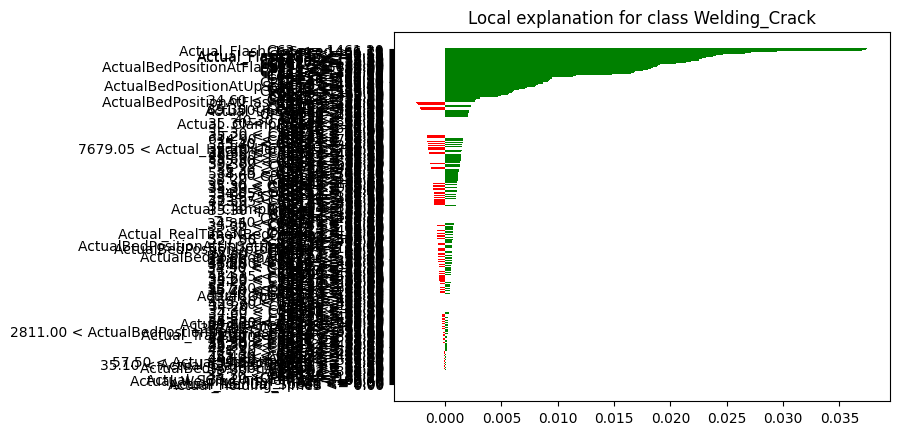

In [ ]:
fig = explanation.as_pyplot_figure(label=1)